In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [4]:
# Load the medical transcription dataset
file_path = r"D:\Applied Natural Language Processing\AT2\mtsamples.csv"
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [5]:
# Display the first few rows of the dataset
print(df.head())

   Unnamed: 0                                        description  \
0           0   A 23-year-old white female presents with comp...   
1           1           Consult for laparoscopic gastric bypass.   
2           2           Consult for laparoscopic gastric bypass.   
3           3                             2-D M-Mode. Doppler.     
4           4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL 

In [6]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values if they are significant
df.dropna(inplace=True)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

# Convert text to lowercase
df['transcription'] = df['transcription'].str.lower()

# Remove special characters, numbers, and extra spaces
df['transcription'] = df['transcription'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Remove extra spaces
df['transcription'] = df['transcription'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Display the cleaned dataset
print(df.head())

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64
   Unnamed: 0                                        description  \
0           0   A 23-year-old white female presents with comp...   
1           1           Consult for laparoscopic gastric bypass.   
2           2           Consult for laparoscopic gastric bypass.   
3           3                             2-D M-Mode. Doppler.     
4           4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary       

In [7]:
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this yearold white female presents ...,"allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,d mmode left atrial enlargement with left atri...,"cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thic...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3898 non-null   int64 
 1   description        3898 non-null   object
 2   medical_specialty  3898 non-null   object
 3   sample_name        3898 non-null   object
 4   transcription      3898 non-null   object
 5   keywords           3898 non-null   object
dtypes: int64(1), object(5)
memory usage: 182.8+ KB


        Unnamed: 0
count  3898.000000
mean   2291.417907
std    1422.657670
min       0.000000
25%    1052.250000
50%    2216.500000
75%    3498.750000
max    4995.000000
count     3898.000000
mean      2522.163930
std       1608.699484
min          9.000000
25%       1358.000000
50%       2175.000000
75%       3327.000000
max      12098.000000
Name: length, dtype: float64


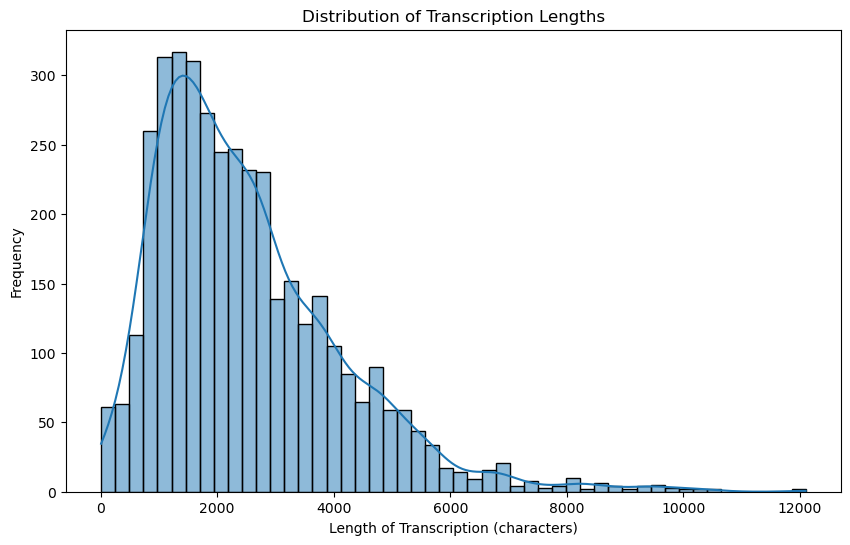

In [9]:
# Get basic statistics about the dataset
print(df.describe())

# Check the distribution of the transcription lengths
df['length'] = df['transcription'].apply(len)
print(df['length'].describe())

# Plot the distribution of transcription lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=50, kde=True)
plt.title('Distribution of Transcription Lengths')
plt.xlabel('Length of Transcription (characters)')
plt.ylabel('Frequency')
plt.show()

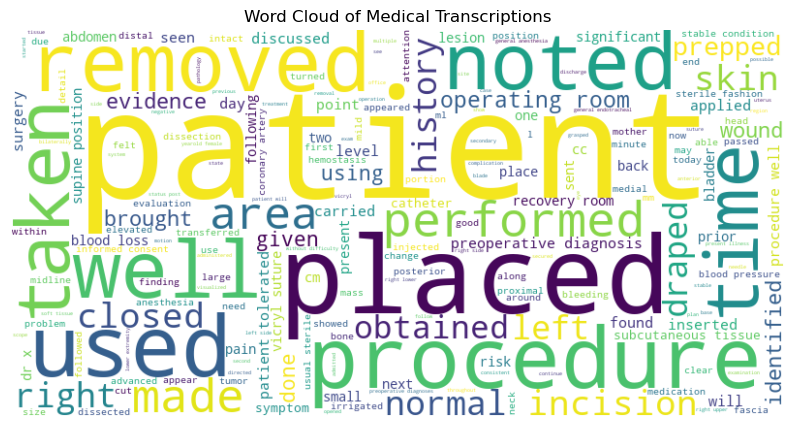

In [10]:
# Generate a word cloud for the transcriptions
text = ' '.join(df['transcription'].tolist())
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Medical Transcriptions')
plt.show()

[('patient', 14765), ('right', 8342), ('left', 8069), ('placed', 6236), ('procedure', 4596), ('well', 4497), ('normal', 4299), ('using', 3449), ('history', 3234), ('incision', 3221)]


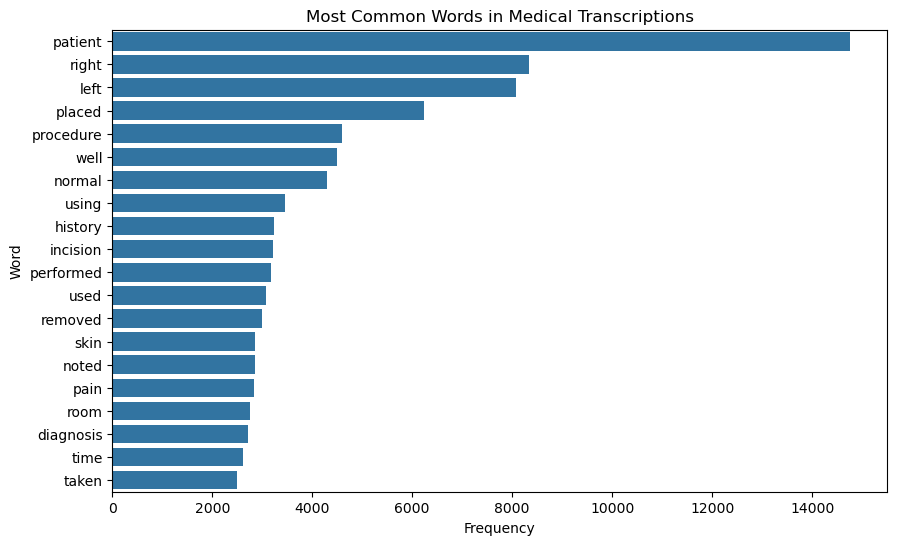

In [11]:
# Tokenize the words in the transcriptions
words = ' '.join(df['transcription'].tolist()).split()

# Remove stopwords and get the frequency of each word
filtered_words = [word for word in words if word not in STOPWORDS]
word_freq = Counter(filtered_words)

# Display the most common words
print(word_freq.most_common(10))

# Plot the most common words
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words)
plt.title('Most Common Words in Medical Transcriptions')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

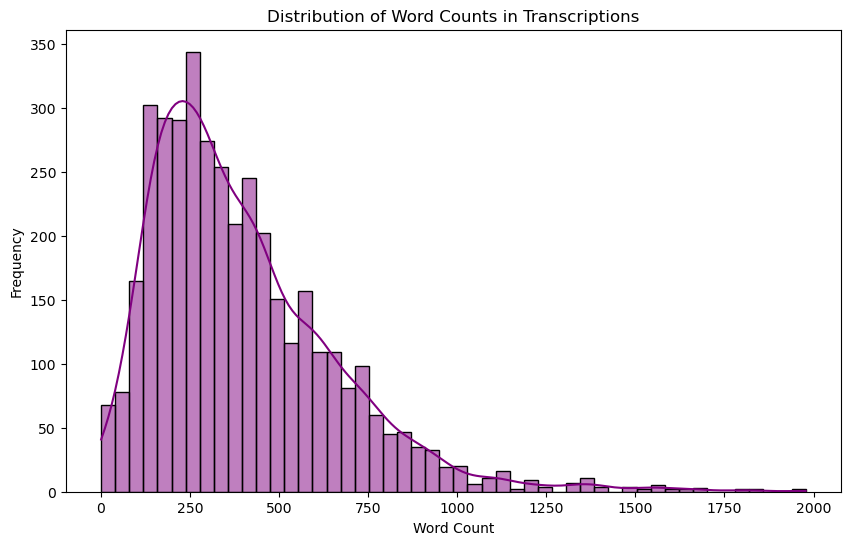

In [12]:
# Calculate word count for each transcription
df['word_count'] = df['transcription'].apply(lambda x: len(x.split()))

# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True, color='purple')
plt.title('Distribution of Word Counts in Transcriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

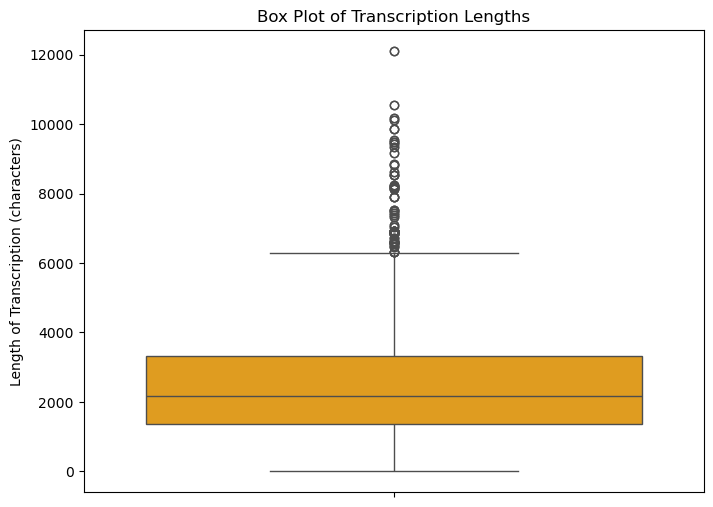

In [13]:
# Box plot to visualize the distribution of transcription lengths
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['length'], color='orange')
plt.title('Box Plot of Transcription Lengths')
plt.ylabel('Length of Transcription (characters)')
plt.show()

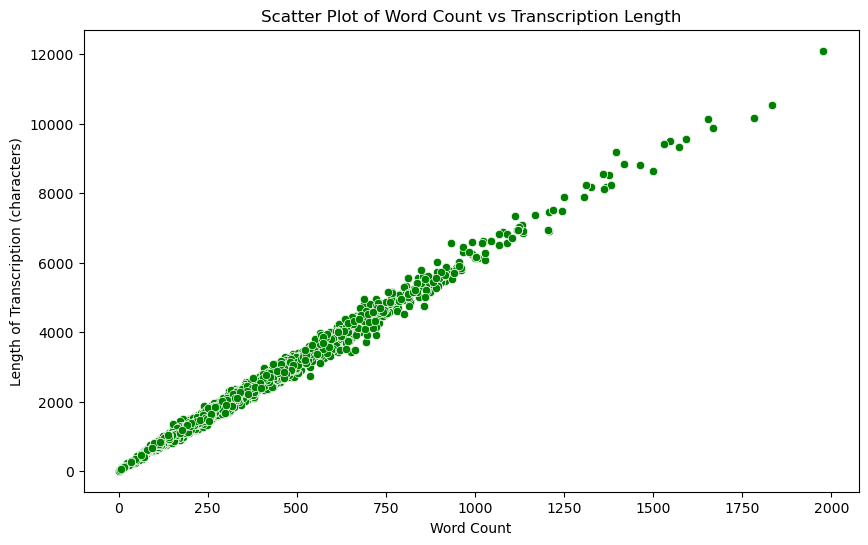

In [14]:
# Scatter plot of word count vs transcription length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='length', data=df, color='green')
plt.title('Scatter Plot of Word Count vs Transcription Length')
plt.xlabel('Word Count')
plt.ylabel('Length of Transcription (characters)')
plt.show()

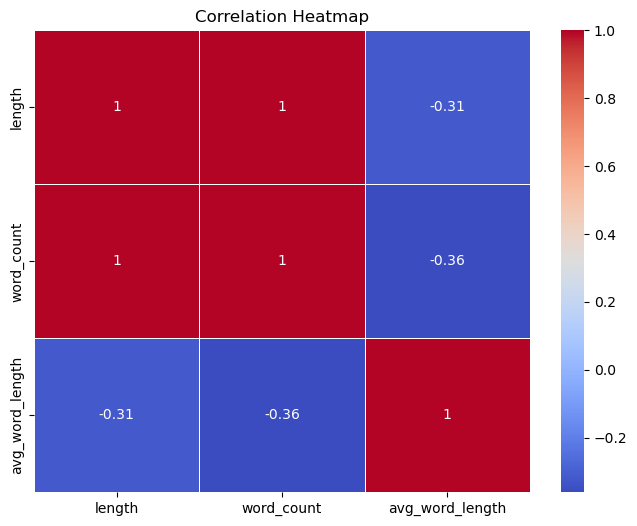

In [15]:
# Calculate additional features for the heatmap
df['avg_word_length'] = df['length'] / df['word_count']

# Create a correlation matrix
corr_matrix = df[['length', 'word_count', 'avg_word_length']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# # Save the cleaned dataset to a new CSV file
cleaned_file_path = r"D:\Applied Natural Language Processing\AT2\mtsamples1.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")